In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("C://Users//het14//A. GFG DataScience//Data//titanic_data.csv")

In [10]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Numerical Value Analysis

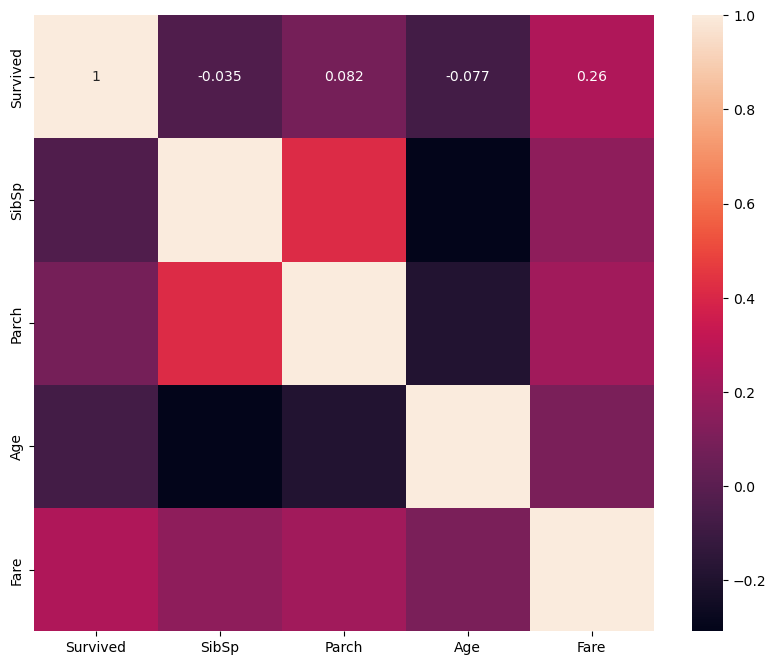

In [18]:
plt.figure(figsize = (10,8))
heatmap = sns.heatmap(df[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot = True)

Only Fare feature seems to have a significative correlation with the survival probability.<br>

It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

# sibsp - Number of siblings / spouses aboard the Titanic

In [21]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [25]:
df['SibSp'].nunique()

7

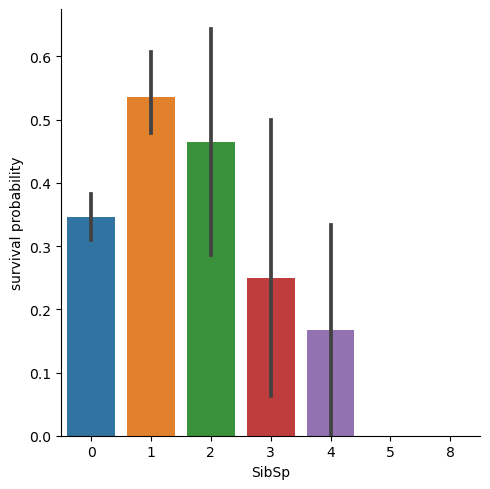

In [28]:
bargraph_sibsp = sns.catplot(x = "SibSp", y = "Survived", data = df, kind = "bar")
bargraph_sibsp = bargraph_sibsp.set_ylabels("survival probability")

It seems that passengers having a lot of siblings/spouses have less chance to survive.<br>
Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.

# Age

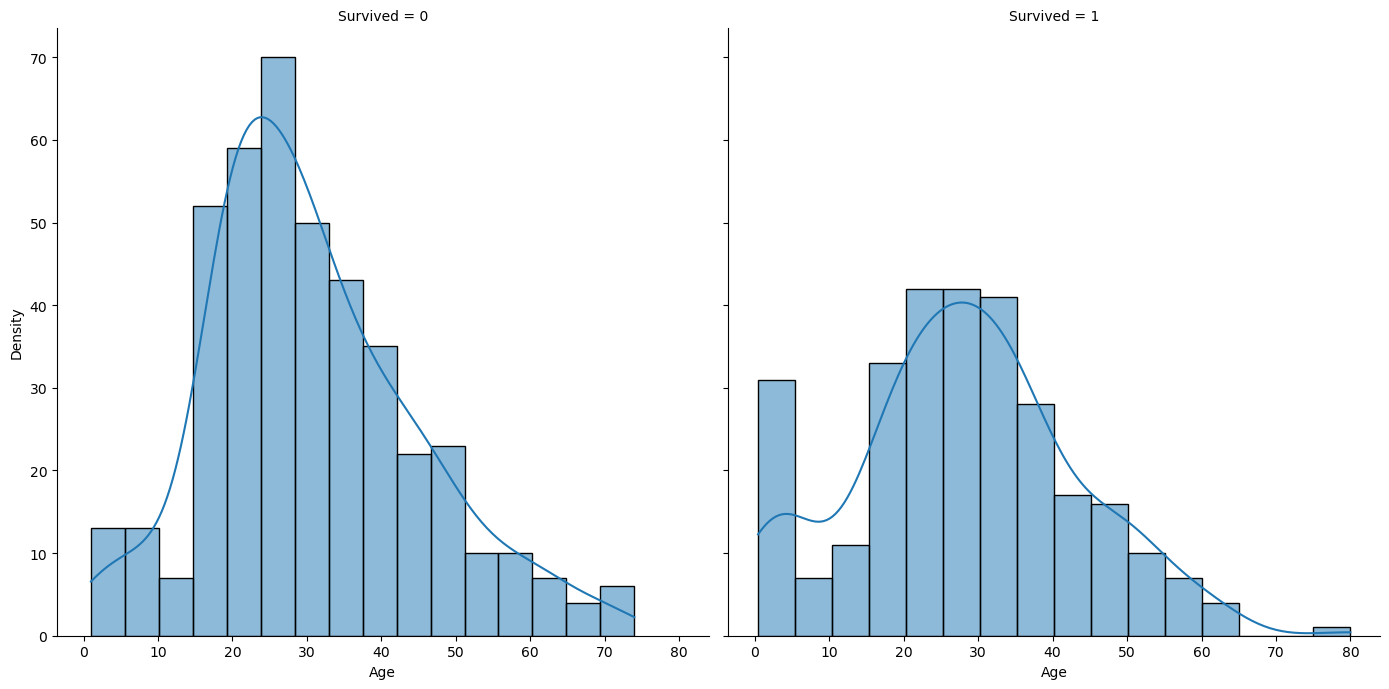

In [33]:
age_visual = sns.FacetGrid(df, col='Survived', height=7)
age_visual.map(sns.histplot, "Age", kde=True)
age_visual.set_ylabels("Density")

Age distribution seems to be a tailed distribution, maybe a gaussian distribution.


We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survive
.

So, even if "Age" is not correlated with "Survive
d", we can see that there is age categories of passengers that of have more or less chance to surv
ve.

It seems that very young passengers have more chance to survive.

# Sex

Text(0.5, 1.0, 'Survival Distribution by Age')

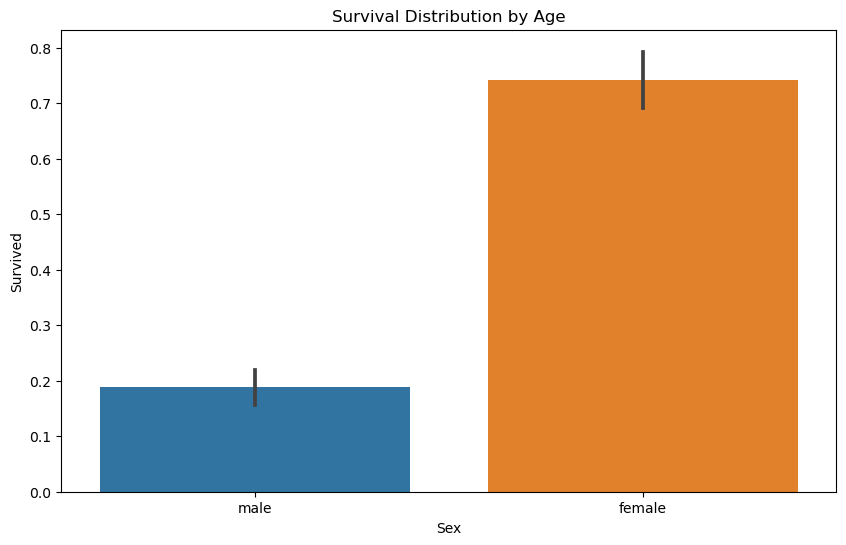

In [35]:
plt.figure(figsize = (10,6))
sns.barplot(x='Sex', y= 'Survived', data = df)
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.title("Survival Distribution by Age")

In [36]:
df[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


It is clearly obvious that Male have less chance to survive than Female. So Sex, might play an important role in the prediction of the survival. For those who have seen the Titanic movie (1997), I am sure, we all remember this sentence during the evacuation - Women and children first

# Pclass

Text(0.5, 1.0, 'Survival Rate based on PClass')

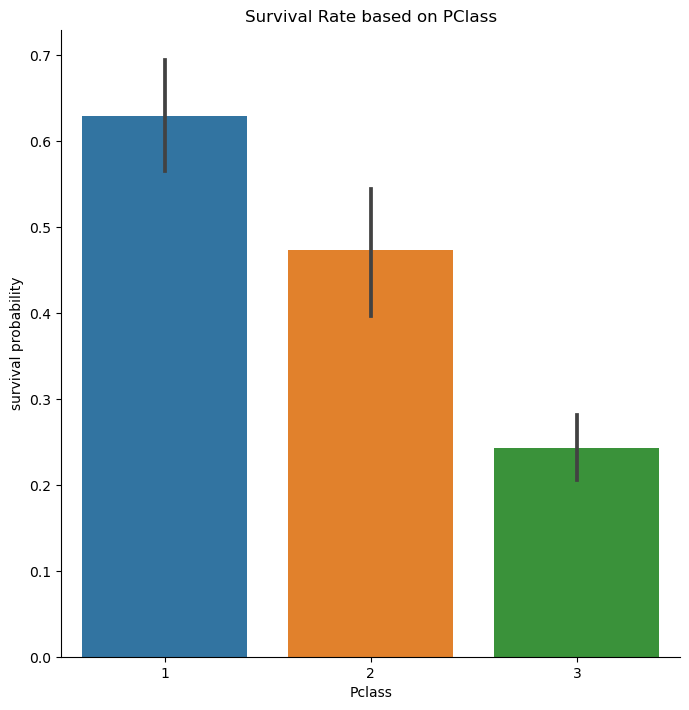

In [50]:
sns.catplot(x = "Pclass", y = "Survived", data = df, kind = "bar", height = 7)
plt.ylabel("survival probability")
plt.title("Survival Rate based on PClass")

In [41]:
df[['Pclass', 'Survived']].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## Pclass vs Survived by sex

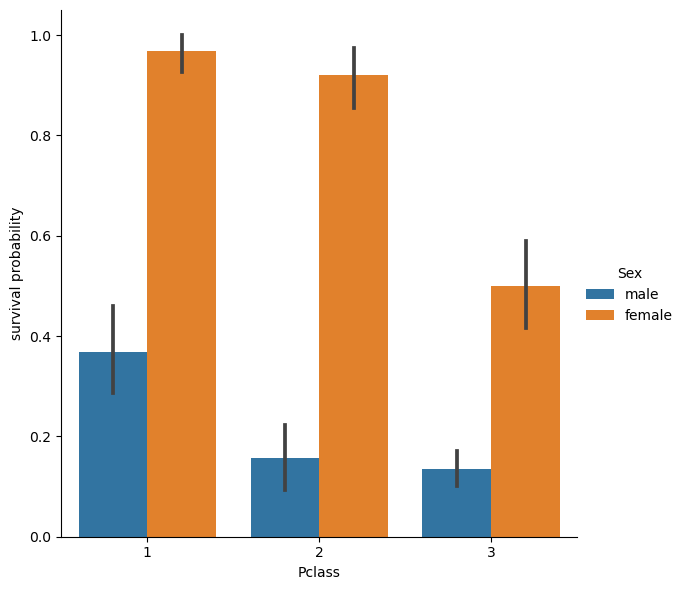

In [43]:
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df, height=6, kind="bar")
g = g.set_ylabels("survival probability")

# Embarked

In [46]:
df['Embarked'].isna().sum()

2

In [47]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [48]:
df['Embarked'].fillna('S', inplace = True)

Text(0.5, 1.0, 'Survival Rate based on Embarked')

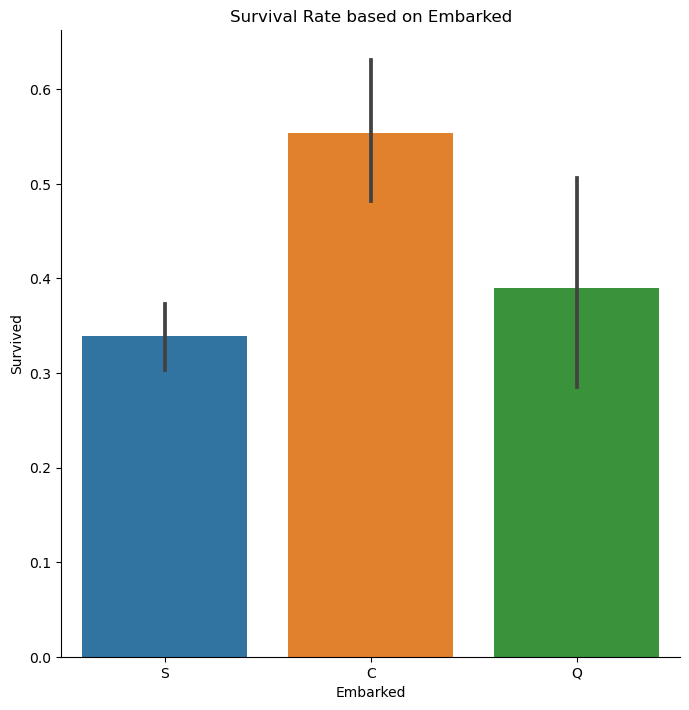

In [54]:
sns.catplot(x="Embarked", y="Survived",data = df, height = 7, kind = 'bar')
plt.title("Survival Rate based on Embarked")

Passenger coming from Cherbourg (C) have more chance to survive.

## Let's find the reason

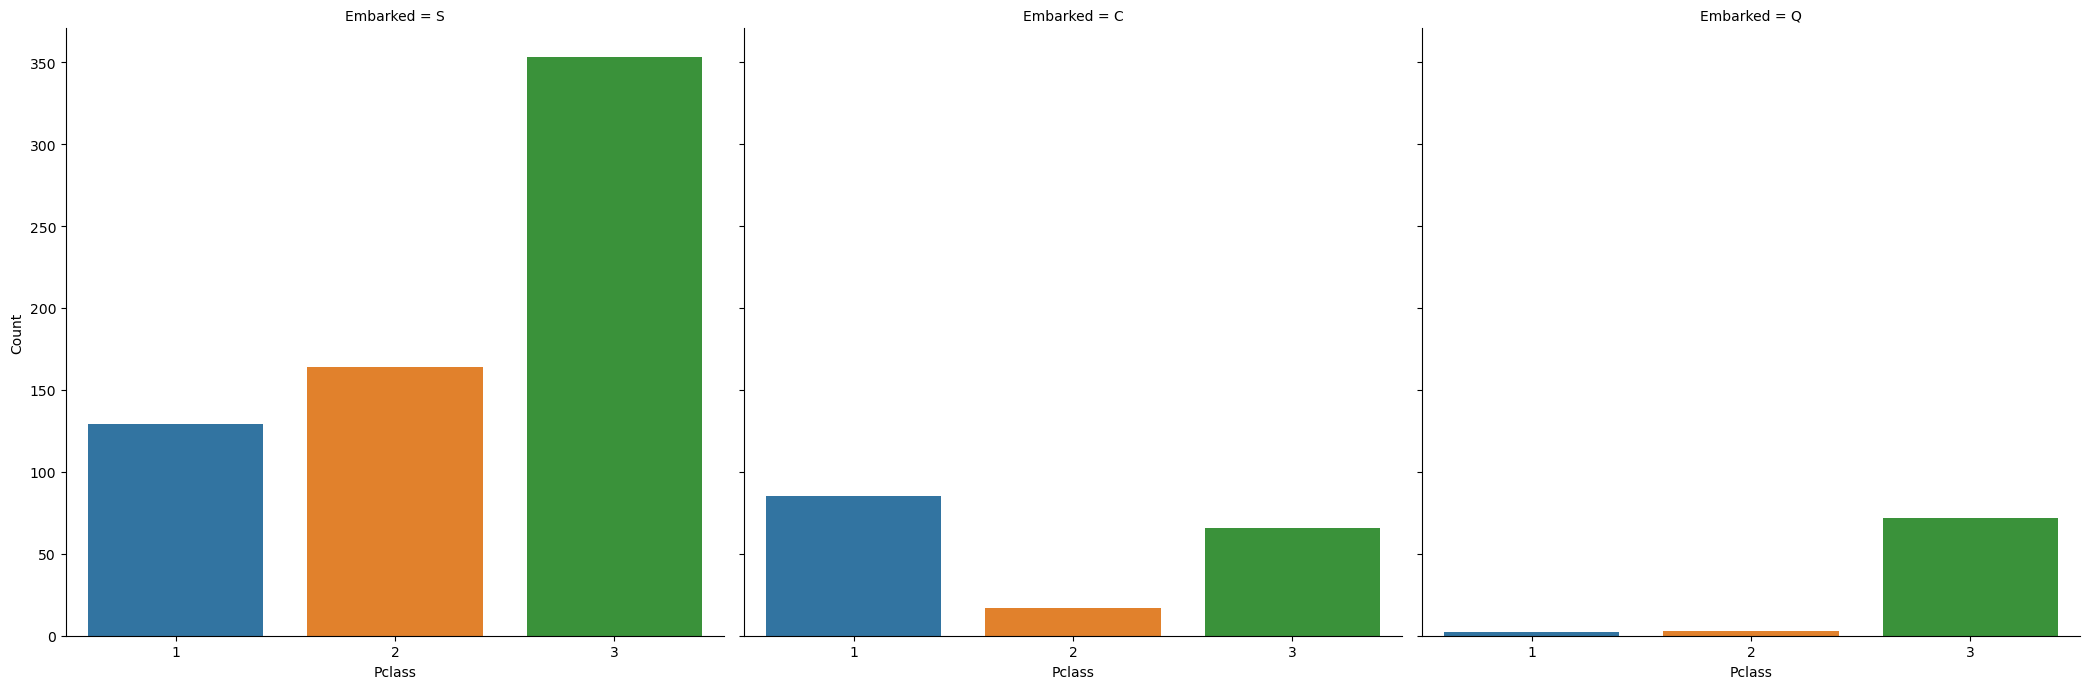

In [57]:
g = sns.catplot(x="Pclass", col="Embarked", data=df, height=7, kind="count")
g.set_ylabels("Count")

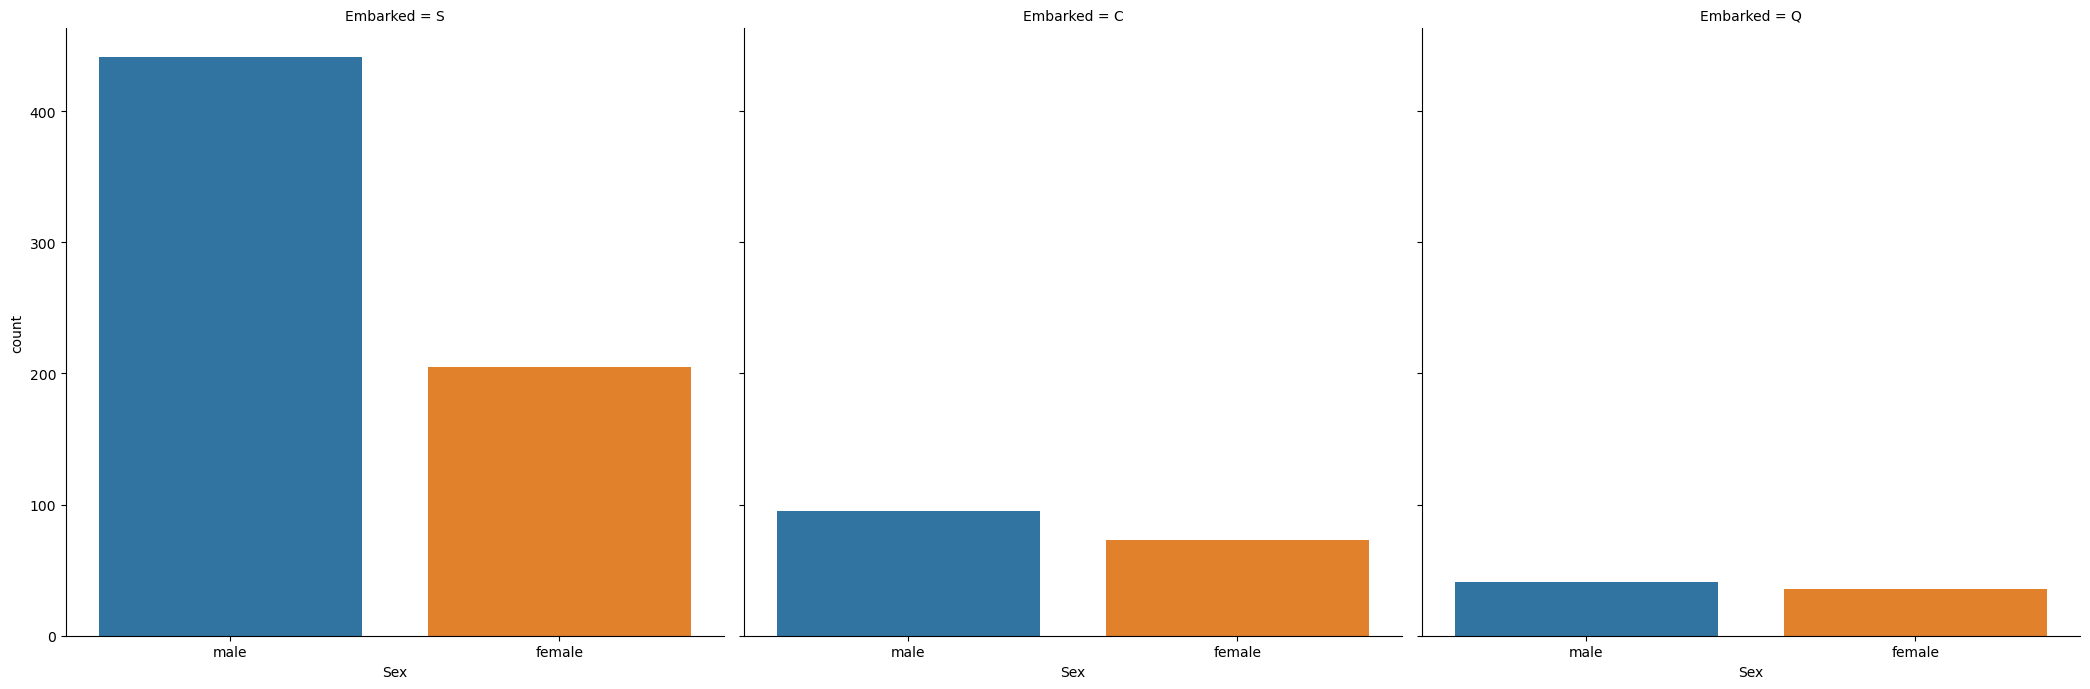

In [59]:
g = sns.catplot(x="Sex", col="Embarked",  data=df, height=7, kind="count")

Cherbourg passengers are mostly in first class which have the highest survival rate.

Southampton (S) and Queenstown (Q) passangers are mostly in third class.

## Filling Up Age NaN

In [61]:
mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill NaN values in Age column with random values generated
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice

In [62]:
df["Age"].isnull().sum()

0

## Preparing Data

In [64]:
df.drop(columns = ['PassengerId','Cabin', 'Ticket','Name'], axis=1, inplace = True)

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [72]:
transform = ['Sex', 'Embarked']

In [74]:
for i in transform:
    df[i] = le.fit_transform(df[i])

In [75]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Splitting Data

In [78]:
x = df.drop(df.columns[[0]], axis = 1)
y = df['Survived']

In [79]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [80]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state =0)

# Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

# Classification Models

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [84]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [85]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [86]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [87]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [88]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  80.45
Support Vector      :  81.01
Decision Tree       :  78.21
K-NN Classifier     :  81.56
Random Forest       :  85.47
